c) grafica cantidad vendida por categoria de producto

##PRODUCTOS.csv:

de esta tabla se necesitaba el nombre del prodcuto de la columna nombre, pues de alli se podian asociar al tipo de producto y asi agrupar los productos dependiendo sus respectivas categorias.

In [12]:
import pandas as pd
pd.read_csv("PRODUCTOS.csv", sep=";")

,nombre,nombre_gen,tipo,precio,valoracion,garantia,Vida_util_mes
0,miniglide,Mouse,Periferico,$20,3.0,0,5
1,TechRodent,Mouse,Periferico,$32,2.5,0,7
2,Masterswipe,Mouse,Periferico,$58,4.0,0,10
3,Mightyscroller,Mouse,Periferico,$80,4.6,0,15
4,gizmoclick,Mouse,Periferico,$70,4.8,0,20
5,typomaster,Teclado,Periferico,$30,2.3,0,10
6,qwertyguardian,Teclado,Periferico,$40,2.4,0,15
7,enterwizard,Teclado,Periferico,$46,4.6,0,17
8,shiftmate,Teclado,Periferico,$71,4.7,0,20
9,escaper,Teclado,Periferico,$80,4.5,0,26


##FACTURA.csv:
de esta tabla se podian obtener los productos asociados a su respectiva cantidad para asi hacer sumas de todas las cantidades por producto y sumar luego todas las sumatorias de productos dentro de un mismo tipo.

In [13]:
import pandas as pd
pd.read_csv("FACTURA.csv")

,ID_Factura,Producto,Cantidad
0,10440,escaper,125
1,10440,lamina plastica,65
2,10440,escaper,145
3,10440,miniglide,142
4,10440,LCD 30hz pb23,56
...,...,...,...
131377,22157,earecho,42
131378,22157,LCD 60hz pldas,89
131379,22157,miniglide,107
131380,22157,Vidrio templado,82


##GRAFICA:

para la tabla de "PRODUCTOS.csv" se uso un delimiter para las ";" que aparecian en la tabla por defecto, mientras en la tabla "FACTURA.csv" esto no ocurria, primero se hallo una sumatoria de todos los productos con un mismo nombre y respecto a sus cantidades, para luego sumar todo los productos pertenecientes a una misma categoria, en el eje "x" se ubicarian las categorias de producto, y en el eje "y" se colocarian las cantidades totales por categoria. 

Tipo de producto menos vendido:
Tipo: Complemento, Cantidad Vendida: 699431

Tipo de producto más vendido:
Tipo: Periferico, Cantidad Vendida: 8211838


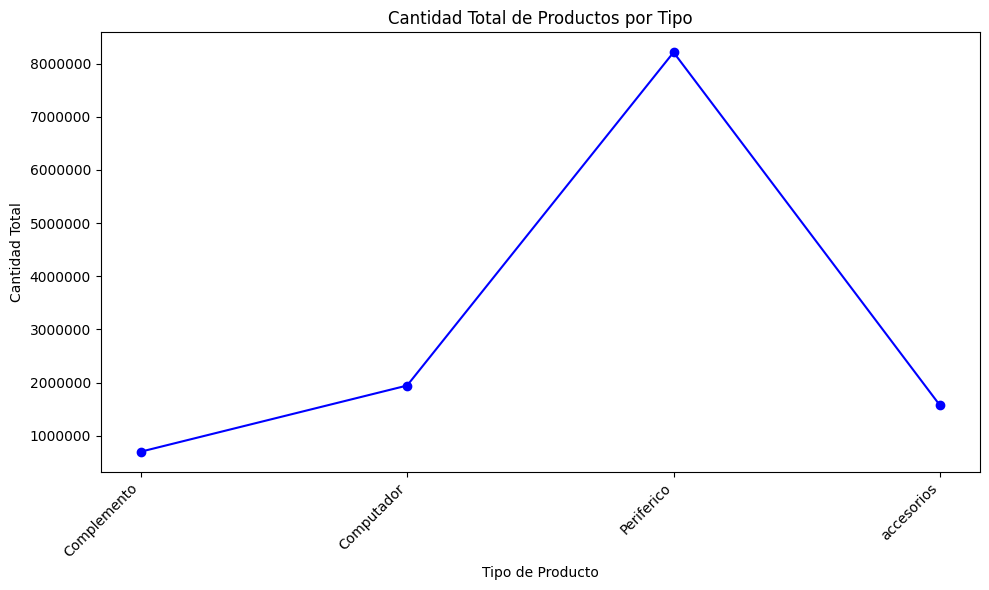

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar los datos de los archivos CSV
productos_df = pd.read_csv('PRODUCTOS.csv', delimiter=';')
factura_df = pd.read_csv('FACTURA.csv')

#Combinar las columnas en base al nombre del producto
merged_df = pd.merge(factura_df, productos_df, left_on='Producto', right_on='nombre', how='left')

#cantidad total por producto
cantidad_total_por_producto = merged_df.groupby('nombre')['Cantidad'].sum().reset_index()

#cantidad total por tipo
cantidad_total_por_tipo = productos_df.groupby('tipo')['nombre'].apply(lambda x: cantidad_total_por_producto[cantidad_total_por_producto['nombre'].isin(x)]['Cantidad'].sum()).reset_index()

#gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cantidad_total_por_tipo['tipo'], cantidad_total_por_tipo['nombre'], marker='o', linestyle='-', color='b')
plt.xlabel('Tipo de Producto')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total De Productos Vendidos Segun Su Tipo')
plt.xticks(rotation=45, ha='right')

#tipo de producto menos vendido y su valor
min_vendido = cantidad_total_por_tipo.loc[cantidad_total_por_tipo['nombre'].idxmin()]

#tipo de producto más vendido
max_vendido = cantidad_total_por_tipo.loc[cantidad_total_por_tipo['nombre'].idxmax()]

print("Tipo de producto menos vendido:")
print(f"Tipo: {min_vendido['tipo']}, Cantidad Vendida: {min_vendido['nombre']}")

print("\nTipo de producto más vendido:")
print(f"Tipo: {max_vendido['tipo']}, Cantidad Vendida: {max_vendido['nombre']}")

plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

##OBSERVACIONES:

los productos de tipo complemento fueron los menos vendidos con 699431 unidades vendidas, mientras que los productos de tipo periferico fueron los mas vendidos con 8211838 unidades vendidas, mucho mas en comparacion a las demas categorias.